<a href="https://colab.research.google.com/github/sh1mz9/DEEP_AR_PREDICTION/blob/main/Zenatix_AC_Data_Analysis_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install --upgrade mxnet-cu101==1.6.0.post0
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

     |████████████████████████████████| 68.7 MB 28 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
     |████████████████████████████████| 10.1 MB 49.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [35]:
df=pd.read_csv('/content/sample_data/AC_Data.csv',index_col=0, parse_dates=True,dayfirst=True)

In [38]:
df=df.dropna()

In [39]:
df

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989


PLOTTING FOR COMPLETE DATA

In [69]:
##

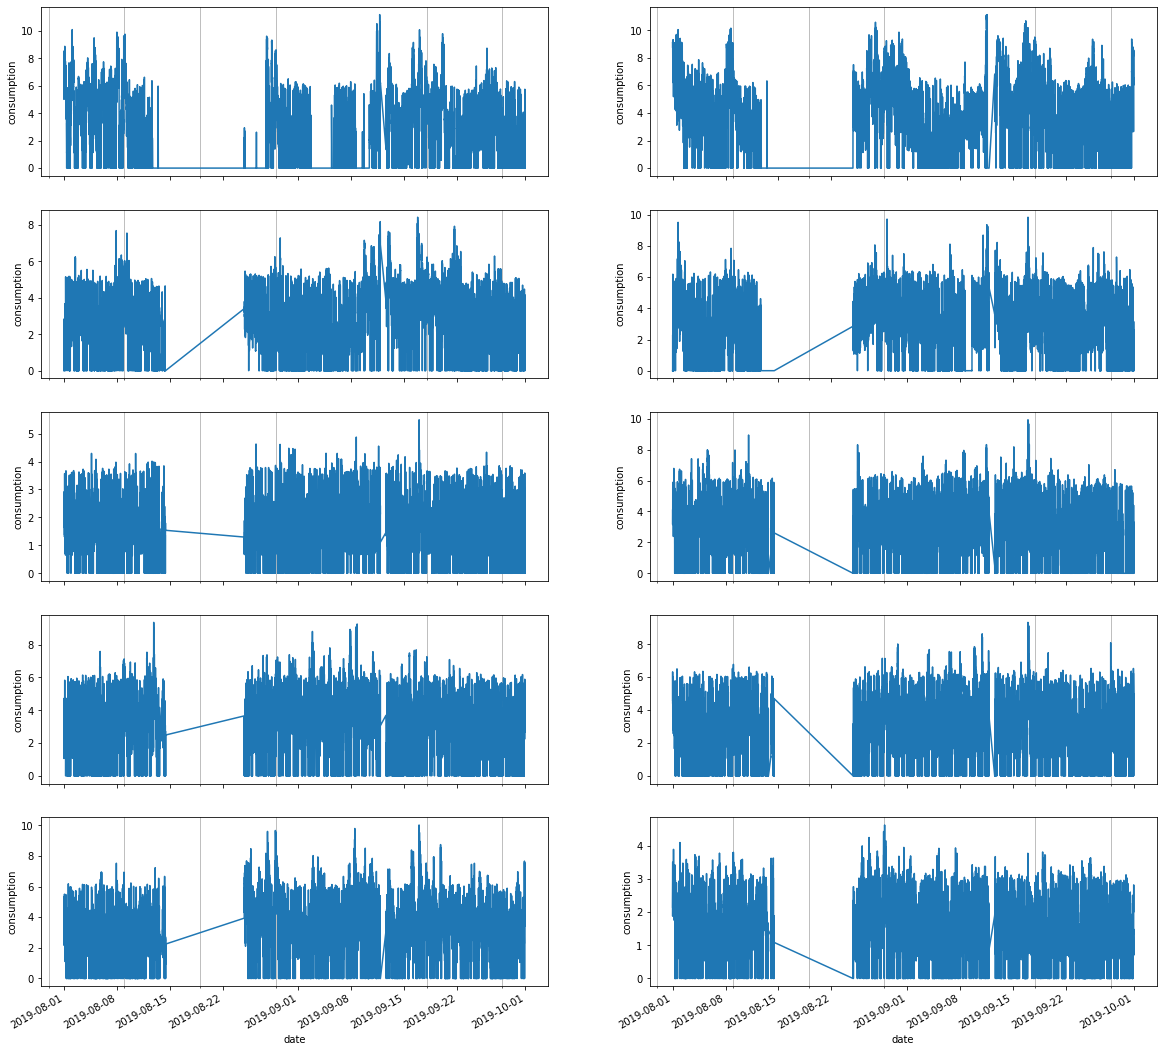

In [45]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    df[df.columns[i]].loc["2019-08-01":"2019-09-30"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("consumption")   
    axx[i].grid(which='minor', axis='x')

In [67]:
df.tail(644)

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,,,,,,,,,,,,,,,,,,
2019-09-30 01:53:00,0.000000,0.000000,1.758005,1.171629,1.429481,0.000000,0.000000,3.480098,2.370682,1.309984,2.567247,2.480222,4.428229,2.648365,3.899823,1.529608,0.000000,0.000000
2019-09-30 01:55:00,0.000000,0.000000,1.776491,1.223757,1.419276,0.000000,1.772782,3.349577,2.463414,1.583402,0.000000,2.443581,4.407540,3.558373,4.313025,1.538257,0.000000,0.000000
2019-09-30 01:57:00,0.000000,0.000000,2.725432,1.633995,1.398914,0.000000,5.206508,1.945827,2.465147,1.611228,0.000000,2.517477,3.846432,4.271302,4.482146,1.542735,0.000000,0.000000
2019-09-30 01:59:00,0.000000,1.244296,3.219248,2.017542,1.401858,0.000000,1.264095,2.294138,2.370653,1.549190,0.000000,2.797080,3.561307,4.014365,4.790192,1.511493,0.000000,0.000000
2019-09-30 02:01:00,0.000000,1.472578,3.135896,1.584801,1.405935,1.057069,1.740853,2.791896,2.315554,1.500462,1.275705,5.586883,3.549530,3.593236,4.116437,2.636024,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989


UNDERSTANDING DAILY USAGE


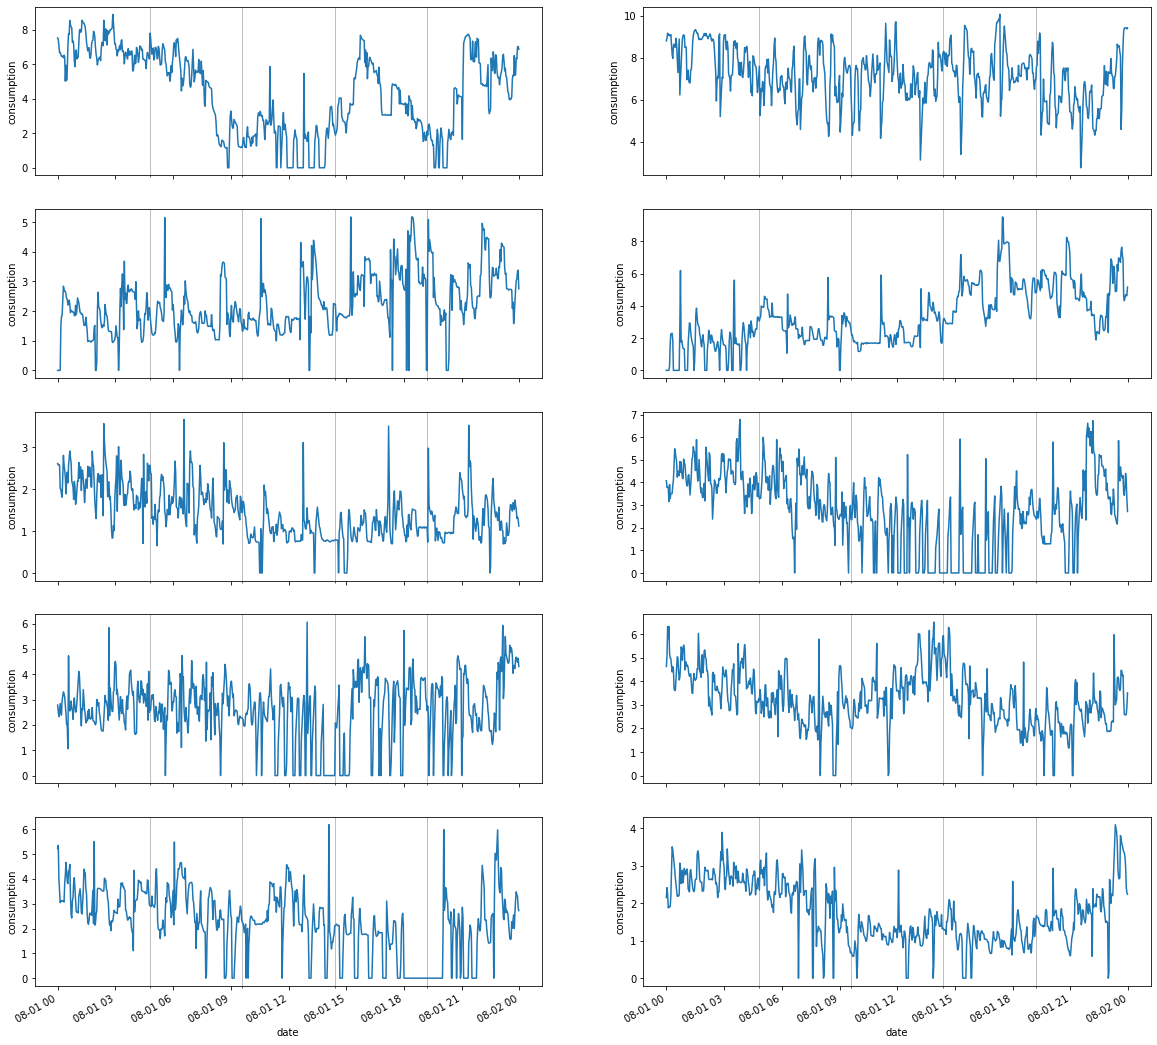

In [49]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(10):
    df[df.columns[i]].loc["2019-08-01":"2019-08-01"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("consumption")   
    axx[i].grid(which='minor', axis='x')

In [50]:
df_input=df.reset_index(drop=True).T.reset_index()

In [51]:
df_input

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,34602,34603,34604,34605,34606,34607,34608,34609,34610,34611,34612,34613,34614,34615,34616,34617,34618,34619,34620,34621,34622,34623,34624,34625,34626,34627,34628,34629,34630,34631,34632,34633,34634,34635,34636,34637,34638,34639,34640,34641
0,AC 1,7.518632,7.426114,7.052986,6.665446,6.674838,6.567156,6.453244,6.465478,6.368224,6.518812,6.416322,5.015493,5.932128,5.055847,5.641572,7.049837,7.762029,7.711736,8.529083,8.270719,8.152132,8.108522,7.265265,7.344490,7.129640,6.222826,5.848217,6.747261,6.814616,6.295766,6.351054,6.410558,7.180985,7.933021,8.001378,7.844670,7.880814,8.538323,8.438301,...,2.877065,3.385026,2.778665,2.340999,2.062181,0.000000,0.771666,1.457822,1.996553,2.607393,2.676105,2.597338,2.579666,3.473809,3.681676,3.222019,2.583553,2.545971,2.428603,0.000000,0.000000,2.789981,5.751356,1.537027,1.925019,1.903075,2.139868,3.150529,3.845901,3.332986,2.894448,3.467300,2.883133,2.807148,0.000000,0.000000,0.000000,0.000000,1.209176,1.430442
1,AC 2,8.788315,8.940615,9.161103,9.065626,9.096130,9.037213,9.044919,9.090386,8.158823,7.962736,8.515938,8.636445,8.520897,8.486223,8.914347,8.600657,7.947444,7.283971,8.127387,8.880902,6.218910,6.925312,7.669975,8.321841,8.896852,9.044677,9.077257,9.046278,8.479978,8.515651,8.490023,6.941245,7.334389,7.397178,6.876635,6.795923,6.794986,7.404121,7.427630,...,6.021880,5.994465,6.612672,6.698387,6.605947,6.594989,5.958449,5.970910,5.968562,5.971804,4.979286,4.252992,4.287738,5.505839,2.762115,3.405388,3.468459,3.443772,3.474830,2.649025,4.489090,5.572586,5.620292,5.490085,6.009931,6.154786,8.436999,8.355832,8.276107,8.253299,8.152282,8.335151,8.573294,8.482985,6.657014,6.089533,6.046765,6.122385,6.152532,6.078281
2,AC 3,0.000000,0.000000,0.000000,0.000000,0.000000,1.473477,1.829450,1.855697,2.839488,2.736410,2.670696,2.665870,2.567306,2.429709,2.393832,2.205583,2.222354,2.370929,2.233653,1.950117,2.030480,2.007622,1.979144,1.962377,1.967871,1.857058,1.839796,2.195709,1.881538,2.019124,2.445680,2.368186,2.283678,2.128946,1.952655,1.950205,1.897691,1.905383,1.873603,...,4.167271,3.690035,2.104844,1.873644,2.309325,2.799213,0.000000,3.159619,2.613284,2.624513,3.216396,3.244981,3.431664,2.836598,3.153926,2.959088,2.592737,2.402468,2.439505,2.398293,2.396177,2.391398,0.000000,0.000000,0.000000,1.017768,2.843818,3.345044,2.040771,3.781845,4.154071,3.280842,2.976298,2.357741,2.418670,2.322677,2.195754,2.192198,2.211421,1.891162
3,AC 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.284310,1.682536,2.259675,2.301862,1.887470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.647438,6.193033,1.753668,1.860660,1.583578,1.358355,1.350048,1.335003,0.000000,0.000000,0.000000,0.000014,0.000000,1.675409,2.361344,2.946146,2.885805,2.344600,2.007017,...,0.000000,0.000000,2.079252,2.653108,2.662460,2.323539,1.832771,1.525807,0.000000,0.000000,1.576986,2.151033,2.250467,2.037119,1.492636,1.770724,2.105576,1.880162,1.518580,1.300645,1.205916,1.410107,0.000000,0.000000,0.000000,0.000000,0.000000,1.230203,2.383490,3.154066,2.358552,2.104241,2.063815,1.764776,1.531352,1.422932,1.861175,2.083315,0.000000,0.000000
4,AC 5,2.617045,2.581625,2.592095,2.575639,2.021472,1.993010,1.887994,1.810324,2.811552,2.580264,2.464268,2.277506,1.891013,2.189802,2.407616,2.156625,2.567319,2.748681,2.914747,2.757239,2.637991,2.208865,2.128697,2.062897,1.758114,2.186168,2.067234,1.640708,1.734295,1.980834,2.191750,2.193640,2.640798,2.261848,2.410436,2.538192,1.970445,2.459993,2.450444,...,0.000000,0.000000,0.971740,1.296333,1.549990,1.393612,1.141563,0.000000,0.000000,0.000000,0.000000,1.782827,3.589927,0.951261,1.234078,1.254177,1.034421,0.892959,0.917934,0.894310,0.887884,0.907177,0.907004,0.000000,0.000000,0.000000,0.742292,0.893772,1.241724,1.524619,1.157666,0.987955,0.000000,0.000000,0.000000,0.000000,0.813454,1.046250,1.448103,1.577491
5,AC 6,4.079041,3.781231,3.80012

In [68]:
##

In [52]:
ts_code=df_input["index"].astype('category').cat.codes.values

In [53]:
ts_code

array([ 0, 10, 11, 12, 13, 14, 15, 16, 17,  1,  2,  3,  4,  5,  6,  7,  8,
        9], dtype=int8)

In [54]:
df_train=df_input.iloc[:,1:34000].values
df_test=df_input.iloc[:,34000:].values

In [55]:
df_train.shape

(18, 33999)

In [56]:
df_test.shape

(18, 643)

In [70]:
freq="1min"
start_train = pd.Timestamp("2019-08-01 00:00:00", freq=freq)
start_test = pd.Timestamp("2019-09-30 01:53:00", freq=freq)
prediction_lentgh=7200 #10 days prediction

In [71]:
estimator = DeepAREstimator(freq=freq, 
                            context_length=7200,
                            prediction_length=prediction_lentgh,
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=2,
                            num_cells=32,
                            cell_type='lstm',
                            trainer=Trainer(epochs=5))

In [72]:
df_train[0:18]

array([[7.51863184, 7.42611426, 7.05298584, ..., 1.73950244, 0.        ,
        0.        ],
       [8.78831543, 8.94061523, 9.16110254, ..., 2.57332593, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.77137183, 2.29255591,
        1.75800488],
       ...,
       [4.11346045, 3.98648291, 3.79788135, ..., 1.7655426 , 1.48554822,
        1.52960828],
       [3.30507178, 3.22058813, 3.13156006, ..., 0.        , 0.        ,
        0.        ],
       [6.73598096, 6.37949951, 6.3634751 , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_train,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_train[0:18],
                             ts_code[0:18].reshape(-1,1))
], freq=freq)

test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_test[0:18],
                            ts_code[0:18].reshape(-1,1))
], freq=freq)

In [74]:
next(iter(train_ds))

{'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2019-08-01 00:00:00', freq='T'),
 'target': array([7.518632 , 7.426114 , 7.0529857, ..., 1.7395024, 0.       ,
        0.       ], dtype=float32)}

In [ ]:
predictor = estimator.train(training_data=train_ds)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  
    predictor=predictor,  
    num_samples=100, 
)

In [ ]:
from tqdm.autonotebook import tqdm

print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(df_test)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(df_test)))

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_lentgh
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [ ]:
for i in tqdm(range(6)):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)

In [ ]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_test[0:18]))

In [ ]:
item_metrics